In [1]:
using PyPlot

In [189]:
#some numerical methods for solving ODEs.

function simple_euler(f::Function, n, x0, dt)

    #Defined two arrays, one for the solution, and another for the times.
    trayectory = [x0]
    time = [0.0]
    
    #iteration
    for i in 1:n

        x_new = trayectory[i] + dt * f(trayectory[i]) #Rule for iteration.
        push!(trayectory, x_new) #Appends new value to the solutions array.
        push!(time, dt*i) #Appends new time to time array.

    end

    return trayectory, time

end

#Similar to simple_euler but with new iteration rule. It is a second order method.
function improved_euler(f::Function, n, x0, dt)
    
    trayectory = [x0]
    time = [0.0]
    
    for i in 1:n
        
        x_aux = trayectory[i] + dt*f(trayectory[i])  #This gives evaluate f in a t+dt step,
        x_new = trayectory[i] + dt*(f(trayectory[i]) + f(x_aux))/2  #then use it two average a better x_new value.
        push!(trayectory, x_new)
        push!(time, dt*i)
        
    end
    
    return trayectory, time
    
end

#Famous Runge-Kutta method. 4 order method
function runge_kutta(f::Function, n, x0, dt)
   
    trayectory = collect(x0)
    time = collect(0.0)
    
    for i in 1:n
       
        k1 = f(trayectory[i]) * dt
        k2 = f(trayectory[i] + k1/2) * dt
        k3 = f(trayectory[i] + k2/2) * dt
        k4 = f(trayectory[i] + k3) * dt
        x_new = trayectory[i] + (k1 + 2*k2 + 2*k3 + k4)/6
        push!(trayectory, x_new)
        push!(time, dt*i)
        
    end
    
    return trayectory, time
end

function plot_rate(f::Function, xi, xf, interval) #For a geometric interpretation
    
    fun = []
    xs = []
    
    for i in xi:interval:xf

        push!(fun,f(i))
        push!(xs, i)
        
    end
    
    plot(xs, fun)
    xlabel("x")
    ylabel("f(x)")
end

plot_rate (generic function with 1 method)

# Example 2.8.1
[S.Stragatz, "Nonlinear Dynamics and Chaos"](https://www.amazon.com/Nonlinear-Dynamics-Chaos-Applications-Nonlinearity/dp/0813349109/ref=sr_1_1?ie=UTF8&qid=1471143114&sr=8-1&keywords=Nonlinear+Dynamics+and+Chaos)

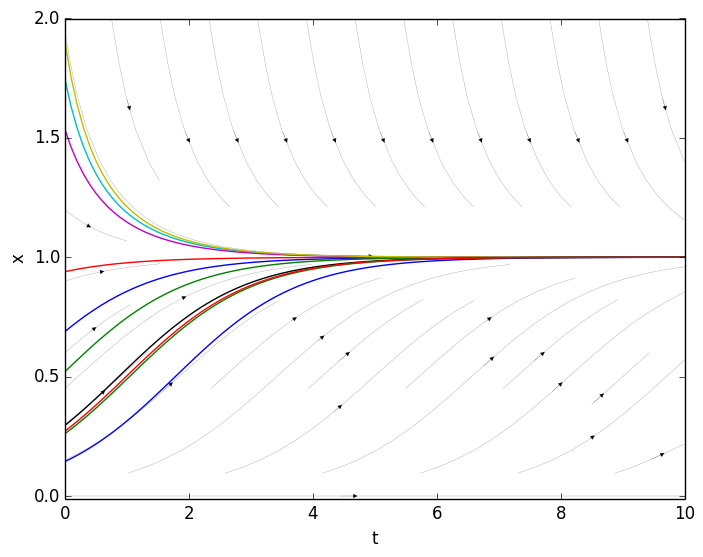

PyObject <matplotlib.text.Text object at 0x332e5fcd0>

In [190]:
#logistic equation:
f(x) = x * (1 - x)

for i in 1:10
    
    Xs , times = runge_kutta(f, 100, rand(1)*2, 0.1)
    plot(times, Xs)
    
end

#Ploting the slope field
x = collect(0:0.1:2)
t = collect(0:10)
u = zeros(length(x), length(t))
v = ones(length(x), length(t))

for i in 1:length(u[:,1])
    for j in 1:length(u[1,:])
        
        u[i,j] = f(x[i])
        
    end
end

streamplot(t, x, v, u, density=0.5, color="k", linewidth=0.1)
xlabel("t")
ylabel("x")

# Exercice 2.8.2

- ### $\dot x = x $.

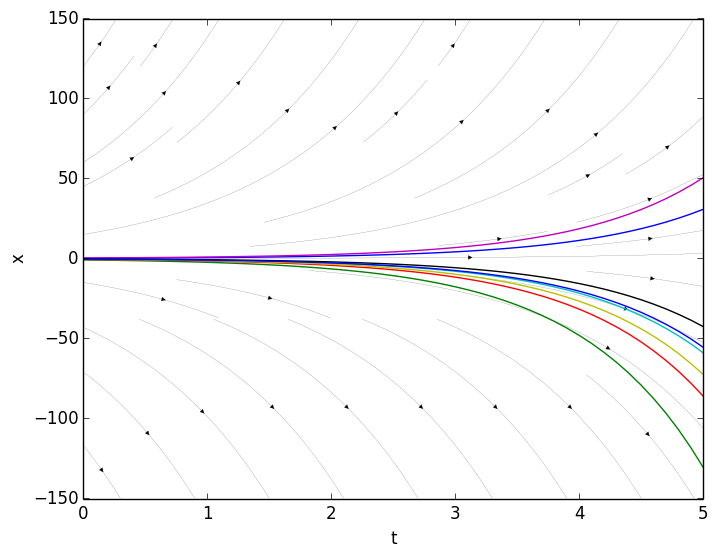

PyObject <matplotlib.text.Text object at 0x33810d090>

In [200]:
f1(x) = x
for i in 1:8

    Xs, time = runge_kutta(f1, 50, rand(1)*2 -1, 0.1)
    plot(time, Xs)
    
end

#Ploting the slope field
x = collect(-150:0.1:150)
t = collect(0:5)
u = zeros(length(x), length(t))
v = ones(length(x), length(t))

for i in 1:length(u[:,1])
    for j in 1:length(u[1,:])
        
        u[i,j] = f1(x[i])
        
    end
end

streamplot(t, x, v, u, density=0.7, color="k", linewidth=0.1)
xlabel("t")
ylabel("x")

- ### $\dot x = 1 - x^2$.

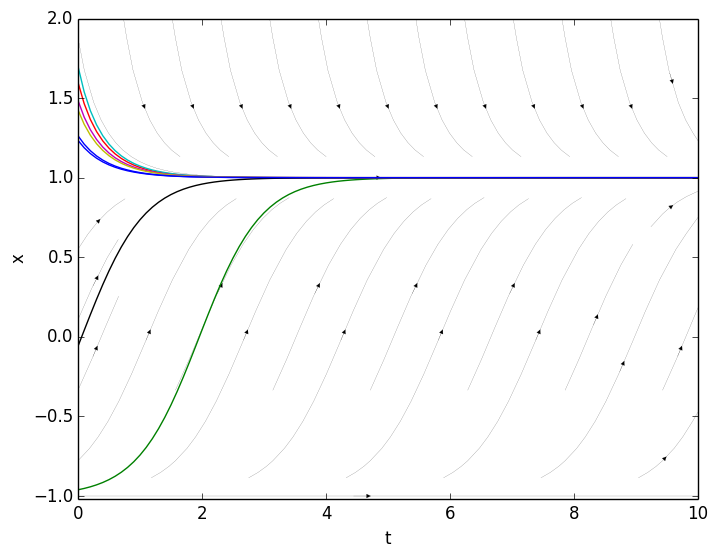

PyObject <matplotlib.text.Text object at 0x3248b1fd0>

In [104]:
f2(x) = 1 - x^2
for i in 1:8

    Xs, time = runge_kutta(f2, 100, rand(1)*3 -1, 0.1)
    plot(time, Xs)
    
end

x = collect(-1:0.1:2)
t = collect(0:10)
u = zeros(length(x), length(t))
v = ones(length(x), length(t))

for i in 1:length(u[:,1])
    for j in 1:length(u[1,:])
        
        u[i,j] = f2(x[i])
        
    end
end

streamplot(t, x, v, u, density=0.5, color="k", linewidth=0.1)
xlabel("t")
ylabel("x")

- ### $\dot x = 1 - 4x (1 - x)$.

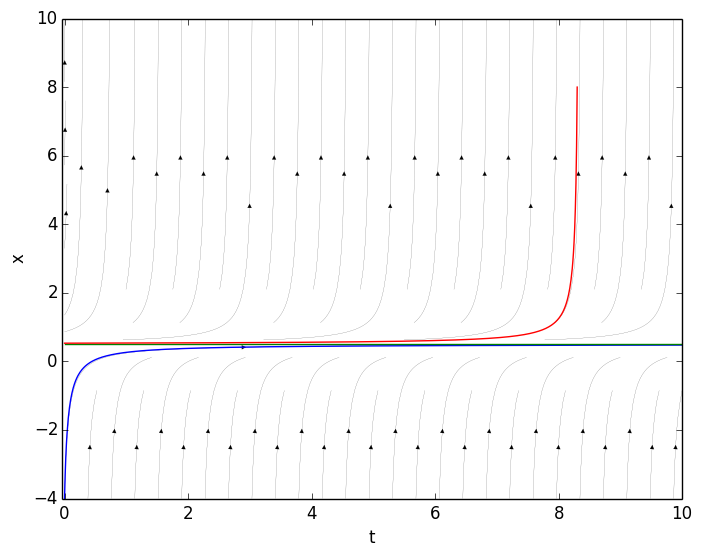

PyObject <matplotlib.text.Text object at 0x3325a8e10>

In [184]:
f3(x) = 1 - 4x + 4x^2
#for i in 1:8

Xs, time = runge_kutta(f3, 1000, -4.0, 0.01)
plot(time, Xs)
Xs, time = runge_kutta(f3, 1000, 0.5, 0.01)
plot(time, Xs)
Xs, time = runge_kutta(f3, 830, 0.53, 0.01)
plot(time, Xs)
#end

x = collect(-4:0.1:10)
t = collect(0:10)
u = zeros(length(x), length(t))
v = ones(length(x), length(t))

for i in 1:length(u[:,1])
    for j in 1:length(u[1,:])
        
        u[i,j] = f3(x[i])
        
    end
end

streamplot(t, x, v, u, density=1, color="k", linewidth=0.1)
xlabel("t")
ylabel("x")

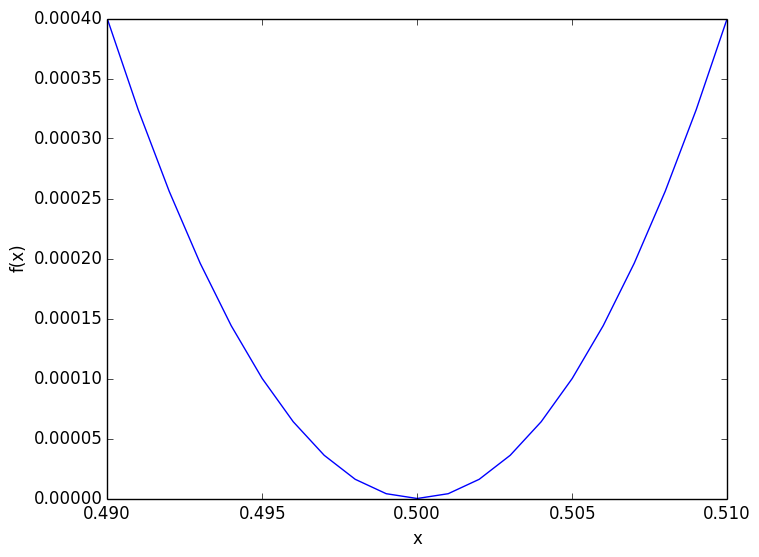

PyObject <matplotlib.text.Text object at 0x332db0f10>

In [188]:
plot_rate(f3, 0.49, 0.51, 0.001)

- ### $\dot x = sin(x)$.

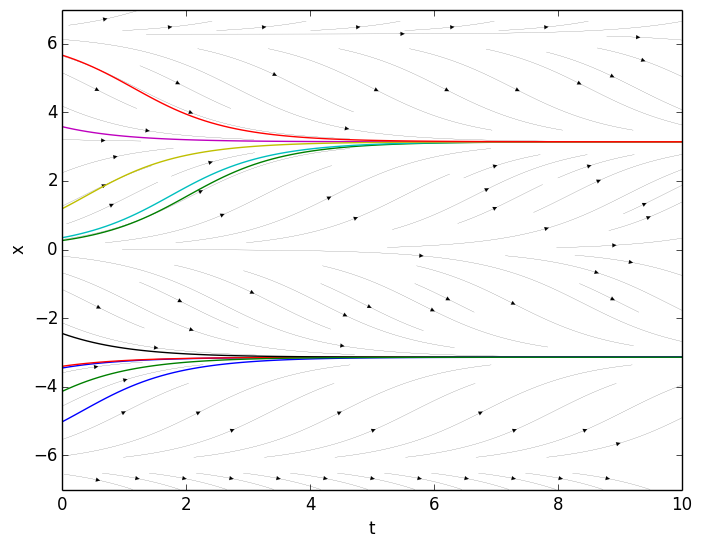

PyObject <matplotlib.text.Text object at 0x3244a6410>

In [103]:
f4(x) = sin(x)
for i in 1:10

    Xs, time = runge_kutta(f4, 100, (rand(1)*12)-6, 0.1)
    plot(time, Xs)
    
end

x = collect(-7:0.1:7)
t = collect(0:10)
u = zeros(length(x), length(t))
v = ones(length(x), length(t))

for i in 1:length(u[:,1])
    for j in 1:length(u[1,:])
        
        u[i,j] = f4(x[i])
        
    end
end

streamplot(t, x, v, u, density=1, color="k", linewidth=0.1)
xlabel("t")
ylabel("x")